In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_modified.csv')
train_diuresis = pd.read_excel('Train_dataset.xlsx', 'Diuresis_TS')
test = pd.read_excel('Test_dataset.xlsx')
test = test.drop(['Name', 'Designation'], axis = 1)

In [3]:
train_new = pd.get_dummies(train, prefix = train.dtypes.index[train.dtypes.values == 'object'])
test_new = pd.get_dummies(test, prefix = test.dtypes.index[test.dtypes.values == 'object'])
test_new = test_new.reindex(columns = train_new.columns, fill_value=0)

In [4]:
train_new.columns

Index(['people_ID', 'Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', 'Infect_Prob', 'Region_Bengaluru',
       'Region_Bhubaneshwar', 'Region_Chandigarh', 'Region_Chennai',
       'Region_Delhi', 'Gender_Female', 'Gender_Male', 'Married_NO',
       'Married_YES', 'Occupation_Business', 'Occupation_Cleaner',
       'Occupation_Clerk', 'Occupation_Driver', 'Occupation_Farmer',
       'Occupation_Legal', 'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Car', 'Mode_transport_Public',
       'Mode_transport_Walk', 'comorbidity_Coronary Heart Disease',
       'comorbidity_Diabetes', 'comorbidity_Hypertension', 'comorbidity_None',
       'Pulmonary score_<100', 'Pulmonary score_<200', 'Pulmonary score_<300',
       'Pulmonary score_<400', 'cardiological pressure_Elevated',


In [5]:
test_new.columns

Index(['people_ID', 'Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', 'Infect_Prob', 'Region_Bengaluru',
       'Region_Bhubaneshwar', 'Region_Chandigarh', 'Region_Chennai',
       'Region_Delhi', 'Gender_Female', 'Gender_Male', 'Married_NO',
       'Married_YES', 'Occupation_Business', 'Occupation_Cleaner',
       'Occupation_Clerk', 'Occupation_Driver', 'Occupation_Farmer',
       'Occupation_Legal', 'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Car', 'Mode_transport_Public',
       'Mode_transport_Walk', 'comorbidity_Coronary Heart Disease',
       'comorbidity_Diabetes', 'comorbidity_Hypertension', 'comorbidity_None',
       'Pulmonary score_<100', 'Pulmonary score_<200', 'Pulmonary score_<300',
       'Pulmonary score_<400', 'cardiological pressure_Elevated',


In [6]:
train_new

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,...,comorbidity_Hypertension,comorbidity_None,Pulmonary score_<100,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1,1.0,2,0,68,8,441.000000,154.0,93.0,233.0,...,1,0,0,0,0,1,0,1,0,0
1,2,2.0,2,0,64,15,278.806261,121.0,56.0,328.0,...,0,0,1,0,0,0,0,0,0,1
2,3,1.0,2,0,19,13,416.000000,124.0,137.0,213.0,...,0,1,0,0,1,0,1,0,0,0
3,4,1.0,2,0,33,9,410.000000,98.0,167.0,275.0,...,0,0,0,1,0,0,0,0,1,0
4,5,2.0,2,0,23,7,390.000000,21.0,153.0,331.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,22691,2.0,8,2,20,14,134.000000,67.0,24.0,209.0,...,0,0,0,0,0,1,0,1,0,0
10578,22692,0.0,8,2,42,4,387.000000,102.0,134.0,211.0,...,0,1,0,0,0,1,0,1,0,0
10579,22693,0.0,8,2,59,3,177.000000,111.0,151.0,296.0,...,0,0,1,0,0,0,0,0,0,1
10580,22694,1.0,8,2,49,6,352.000000,140.0,110.0,253.0,...,0,0,0,0,1,0,1,0,0,0


In [7]:
test_new

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,...,comorbidity_Hypertension,comorbidity_None,Pulmonary score_<100,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,5942,2,4,1,52,3,388,153,196,240,...,0,0,0,1,0,0,0,0,1,0
1,18664,2,4,1,53,11,409,95,138,241,...,0,0,0,1,0,0,0,0,1,0
2,5603,2,4,1,35,9,440,40,166,236,...,0,0,1,0,0,0,0,0,0,1
3,5649,2,4,1,31,12,206,78,83,211,...,0,1,0,0,1,0,1,0,0,0
4,5099,2,4,1,51,6,229,109,207,312,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,23737,0,11,2,55,5,417,16,36,346,...,0,0,0,0,0,1,0,1,0,0
14494,11171,0,11,2,44,4,199,22,29,278,...,0,1,0,0,1,0,1,0,0,0
14495,23243,0,11,2,46,6,161,15,28,294,...,0,1,0,0,1,0,1,0,0,0
14496,11199,0,11,2,34,5,174,31,24,227,...,0,0,0,1,0,0,0,0,1,0


/home/shreyas/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


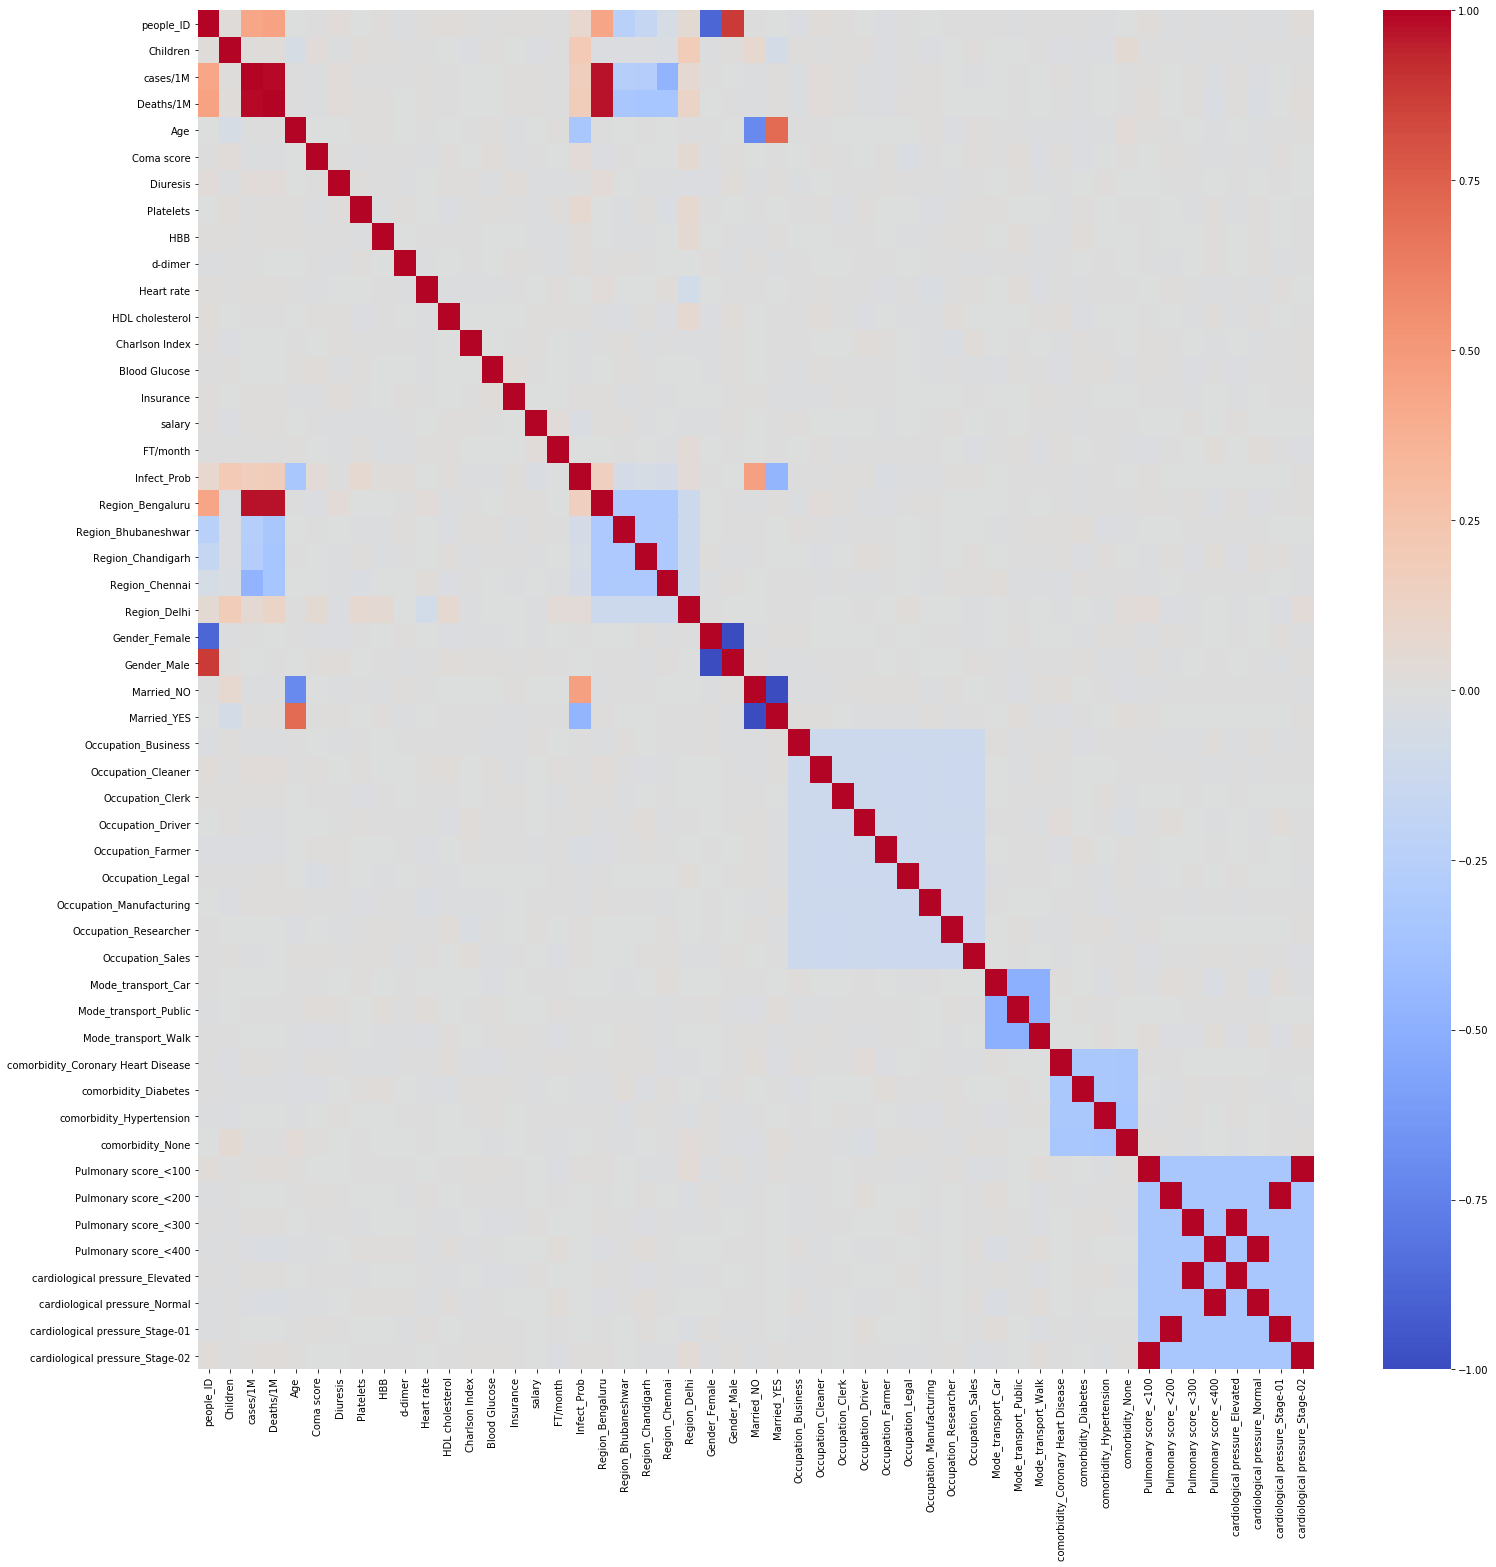

In [8]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(train_new.corr(), cmap= 'coolwarm', vmin = -1, vmax = 1)


In [9]:
X_train = train_new[['Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', 'Region_Bengaluru',
       'Region_Bhubaneshwar', 'Region_Chandigarh', 'Region_Chennai',
       'Region_Delhi', 'Gender_Female', 'Gender_Male', 'Married_NO',
       'Married_YES', 'Occupation_Business', 'Occupation_Cleaner',
       'Occupation_Clerk', 'Occupation_Driver', 'Occupation_Farmer',
       'Occupation_Legal', 'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Car', 'Mode_transport_Public',
       'Mode_transport_Walk', 'comorbidity_Coronary Heart Disease',
       'comorbidity_Diabetes', 'comorbidity_Hypertension', 'comorbidity_None',
       'Pulmonary score_<100', 'Pulmonary score_<200', 'Pulmonary score_<300',
       'Pulmonary score_<400', 'cardiological pressure_Elevated',
       'cardiological pressure_Normal', 'cardiological pressure_Stage-01',
       'cardiological pressure_Stage-02']]
y_train = train_new['Infect_Prob']

X_test = test_new[['Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate',
       'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance',
       'salary', 'FT/month', 'Region_Bengaluru',
       'Region_Bhubaneshwar', 'Region_Chandigarh', 'Region_Chennai',
       'Region_Delhi', 'Gender_Female', 'Gender_Male', 'Married_NO',
       'Married_YES', 'Occupation_Business', 'Occupation_Cleaner',
       'Occupation_Clerk', 'Occupation_Driver', 'Occupation_Farmer',
       'Occupation_Legal', 'Occupation_Manufacturing', 'Occupation_Researcher',
       'Occupation_Sales', 'Mode_transport_Car', 'Mode_transport_Public',
       'Mode_transport_Walk', 'comorbidity_Coronary Heart Disease',
       'comorbidity_Diabetes', 'comorbidity_Hypertension', 'comorbidity_None',
       'Pulmonary score_<100', 'Pulmonary score_<200', 'Pulmonary score_<300',
       'Pulmonary score_<400', 'cardiological pressure_Elevated',
       'cardiological pressure_Normal', 'cardiological pressure_Stage-01',
       'cardiological pressure_Stage-02']]

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.2)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train)
y_predict2 = model_reg.predict(X_test)
print(y_predict2)
# print(y_test)
# print(mean_squared_error(y_test*100, y_predict2*100))
# plt.scatter(y_test, y_predict2)
# plt.plot(y_test, y_test, 'r')

[52.67355952 52.66604789 51.68380934 ... 45.41994047 45.14481744
 45.34008122]


In [12]:
from statsmodels.tsa.ar_model import AutoReg

train_diuresis_new = train_diuresis.drop(['people_ID'], axis=1)
scaling_factor = 0
for i in range(len(train_diuresis_new)): 
    data = list(train_diuresis_new.loc[i,:].values)
    
    model_ar = AutoReg(data, lags=2) 
    model_ar_fit = model_ar.fit()

    yhat = model_ar_fit.predict(len(data), len(data))
    scaling_factor = scaling_factor + (yhat[0]/data[0])
scaling_factor = scaling_factor/len(train_new)
scaling_factor

4.431688388108518

In [13]:
X_test_p2 = X_test
X_test_p2['Diuresis'] = X_test_p2['Diuresis']*scaling_factor
y_predict_p2 = model_reg.predict(X_test_p2)
print(y_predict_p2)

[52.67355952 52.56204547 51.68380934 ... 45.40441781 45.14655986
 45.32427695]


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
result_p1 = pd.DataFrame()
result_p1['people_ID'] = test['people_ID']
result_p1['Infect_Prob'] = y_predict2
result_p1.to_csv('part1.csv', index = False)

In [15]:
result_p2 = pd.DataFrame()
result_p2['people_ID'] = test['people_ID']
result_p2['Infect_Prob'] = y_predict_p2
result_p2.to_csv('part2.csv', index = False)